Many thanks to Shiva Borzooei and Aidin Tarokhian from Hamadan University of medical Sciences, who provided this datase .All information you can find at Shiva Borzooei

https://archive.ics.uci.edu/dataset/915/differentiated+thyroid+cancer+recurrence

Using this .csv file as part of my learning journey using Python for Data Analysis.



In [2]:
import pandas as pd   
import numpy as np
import matplotlib.pyplot as plt


Lets import the csv.file :

In [3]:

# Corrected file path with .csv extension
filepath = r"C:\Users\User\OneDrive\Desktop\Thyroid_Cancer_Analysis\Thyroid_Diff.csv"

# Use the variable 'filepath' to read the CSV file
df = pd.read_csv(filepath)

# Display the first few rows of the DataFrame
df.head(5)


,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
0,27,F,No,No,No,Euthyroid,Single nodular goiter-left,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Indeterminate,No
1,34,F,No,Yes,No,Euthyroid,Multinodular goiter,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
2,30,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
3,62,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
4,62,F,No,No,No,Euthyroid,Multinodular goiter,No,Micropapillary,Multi-Focal,Low,T1a,N0,M0,I,Excellent,No


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 383 entries, 0 to 382
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Age                   383 non-null    int64 
 1   Gender                383 non-null    object
 2   Smoking               383 non-null    object
 3   Hx Smoking            383 non-null    object
 4   Hx Radiothreapy       383 non-null    object
 5   Thyroid Function      383 non-null    object
 6   Physical Examination  383 non-null    object
 7   Adenopathy            383 non-null    object
 8   Pathology             383 non-null    object
 9   Focality              383 non-null    object
 10  Risk                  383 non-null    object
 11  T                     383 non-null    object
 12  N                     383 non-null    object
 13  M                     383 non-null    object
 14  Stage                 383 non-null    object
 15  Response              383 non-null    ob

No missing values in the Dataset.

#### QUESTIONS 
2. Is there any significant difference in cancer risk between male and female patients?
3. How does smoking status affect the likelihood of different stages of thyroid cancer?
4. Does a history of smoking impact the response to treatment?
5. Is there a relationship between history of radiotherapy and cancer stage or type?
6. How does thyroid function (euthyroid, hyperthyroid, hypothyroid) relate to the risk and stage of cancer?
7. What is the frequency of single nodular goiter versus multinodular goiter among patients?
8. Does the focality of the cancer (uni-focal vs. multi-focal) impact the stage or prognosis?
9. Are there any patterns in pathology findings based on age or gender?
10. How does the presence of adenopathy influence the stage of cancer?


#### 1. What is the distribution of ages among patients? 

Here we need to understand how the ages of the patients are spead out or distributed. Are most of the patients young , middle aged or older? Are the ages spread out evenly or clustered in specific age ranges?

1. First, we need to identify the Age data, as in the column that contains the age information and the extract the Age Data.

In [5]:
# Extracting "Age" column :
ages = df['Age']
ages 

0      27
1      34
2      30
3      62
4      62
       ..
378    72
379    81
380    72
381    61
382    67
Name: Age, Length: 383, dtype: int64

2. (Step a) We can use the value_counts() function to get the frequency of each age:

In [6]:
age_counts = ages.value_counts()

In [7]:
print(age_counts)

Age
31    22
27    13
40    12
26    12
28    12
      ..
79     1
18     1
69     1
76     1
78     1
Name: count, Length: 65, dtype: int64


2. (Step b) Basic Statistics Calculation 

In [41]:
min_age = ages.min()
max_age = ages.max()
mean_age = ages.mean()
median_age = ages.median()
mode_age = ages.mode()[0] # Mode returns a series, so we take the first element-->The most frequent set in our DataBase

print(f"Minimum age is: {min_age}")
print(f"Maximum age is: {max_age}")
print(f"Mean age is: {mean_age}")
print(f"Median age is: {median_age}")
print(f"Mode age is: {mode_age}")


Minimum age is: 15
Maximum age is: 82
Mean age is: 40.866840731070496
Median age is: 37.0
Mode age is: 31


Learned/Notes :
- Mode(): is the value that appears more frequently in a dataset and a dataset can have more than one mode if multiple values have the same highest frequency.
- The output gives us Series object. If there is more than one mode, this Series will contain all modes.
- Since mode() returns a Series, we need to access the first element to get the most common value. This is done using [0].

2. (Step C) Creating a bar chart for age distribution

First Lets ensure we have matplotlib installed

* Notes -----> pip show matplotlib (to check if Matplotlib is installed: command displayed information about the installed package) then 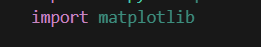


2. (Step d): Plot the Data using Matplotlib---> More information found at https://www.geeksforgeeks.org/data-visualization-using-matplotlib/

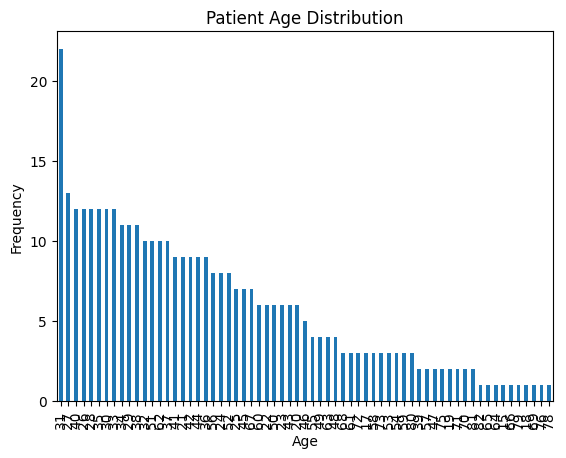

In [9]:
# Creating a bar chart for Age distribution

age_counts.plot(kind='bar')

# set label for x Axis 
plt.xlabel("Age")

# Set label for y Axis 
plt.ylabel("Frequency")

# Adding title for hte chart
plt.title("Patient Age Distribution")

#Display the plot

plt.show()

Notes/Learning

- using plot() --->Creating different types of charts and specifying we want to use a bar chart by using "kind=bar"
- setting the label for the x axis to "Age"
- setting the label for the y axis to "Frequency"

As, we can see the plot is horrible " x axis for age is not clear , ages numbers overlap and unable to read. One common solution I found was the to rotate the X axis labels 

#### # Create a bar chart for age distribution with rotated x-axis labels

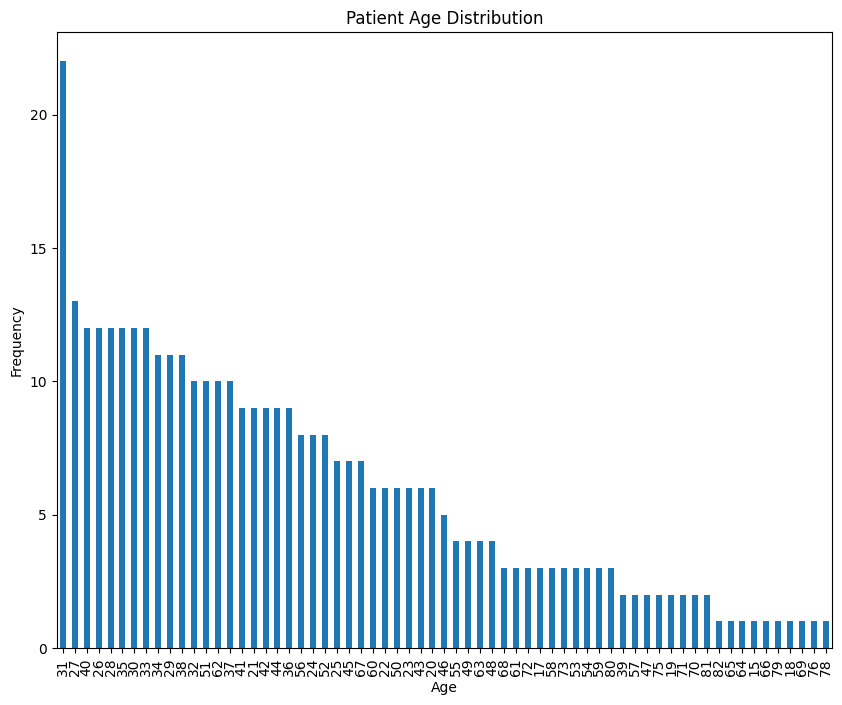

In [10]:
# Increase the figure size for better spacing 
plt.figure(figsize= (10,8))

# Creating a bar chart for Age distribution

age_counts.plot(kind='bar')

# set label for x Axis 
plt.xlabel("Age")

# Set label for y Axis 
plt.ylabel("Frequency")

# Adding title for hte chart
plt.title("Patient Age Distribution")

#Display the plot

plt.show()

In [11]:
df.shape

(383, 17)

Considering I have such a large dataset with 383 rows, maybe I should try a different plot. KDE plot is reccomended for a large number of different values providing a smooth representation of the distribution making it easier to see patterns and trends. Lets try it out :


#### Trying out KDE plot for better visualisation 

In [12]:
import seaborn as sns #another data visualisation library based on Matplotlib

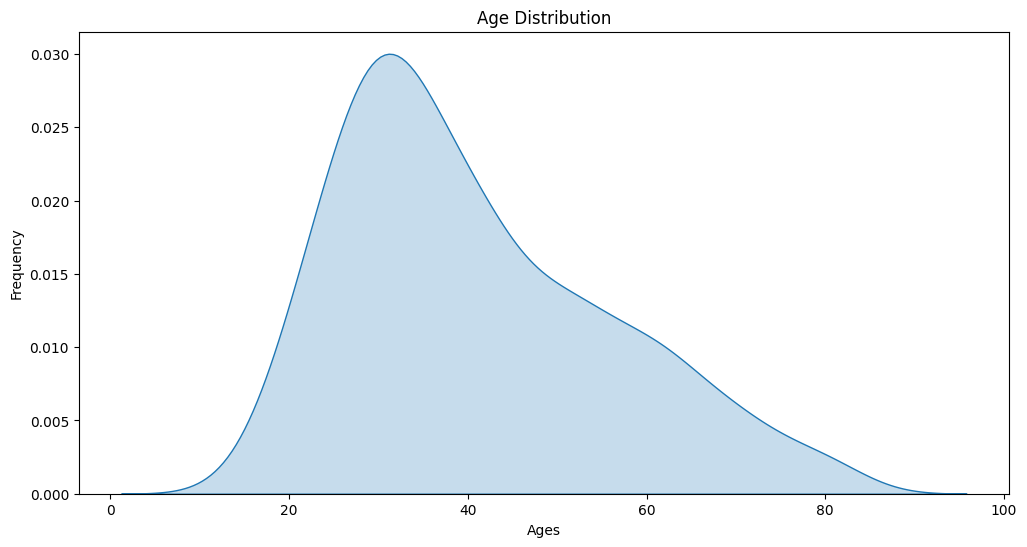

In [42]:
# Create KDE plot
plt.figure(figsize=(12, 6))
sns.kdeplot(ages, fill=True)
plt.title('Age Distribution')
plt.xlabel('Ages')
plt.ylabel('Frequency')
plt.show()

Still not happy ---> Annotate the KDE plot with vertical lines indicate positions of the minimum, maximum, mean, median, and mode ages. The bar above is not so clear..

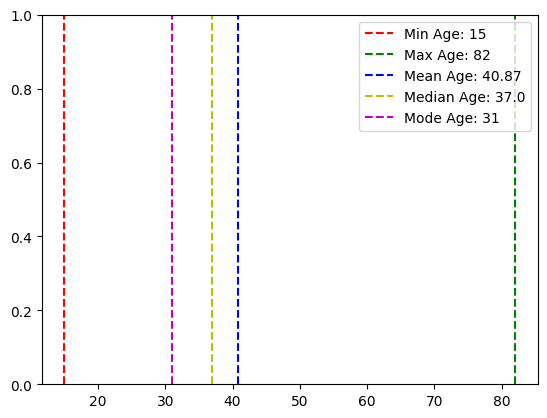

In [14]:
plt.axvline(min_age, color='r', linestyle='--', label=f'Min Age: {min_age}')
plt.axvline(max_age, color='g', linestyle='--', label=f'Max Age: {max_age}')
plt.axvline(mean_age, color='b', linestyle='--', label=f'Mean Age: {mean_age:.2f}')
plt.axvline(median_age, color='y', linestyle='--', label=f'Median Age: {median_age}')
plt.axvline(mode_age, color='m', linestyle='--', label=f'Mode Age: {mode_age}')
plt.legend()

plt.show()

###  Notes/Learn 

##### Adding vertical lines to KDE plot to indicate key statistics, help to visually identify these statistics


- plt.axvline(min_age, ...): Adds a vertical line at the x-coordinate corresponding to min_age.
- color='r': The color of the line is red.
- linestyle='--': The line is dashed.
- label=f'Min Age: {min_age}': The label for the legend, showing the value of the min/max/median etc. age.
- legend () ---> labels specified for each vertical line, makes it easier to identify which line represents.

### 12. What is the relationship between physical examination findings and cancer stage or risk?


Displaying the first 10 lines of the dataframe in order to understand the structure and contents :

In [15]:
df.head(10)

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
0,27,F,No,No,No,Euthyroid,Single nodular goiter-left,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Indeterminate,No
1,34,F,No,Yes,No,Euthyroid,Multinodular goiter,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
2,30,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
3,62,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
4,62,F,No,No,No,Euthyroid,Multinodular goiter,No,Micropapillary,Multi-Focal,Low,T1a,N0,M0,I,Excellent,No
5,52,M,Yes,No,No,Euthyroid,Multinodular goiter,No,Micropapillary,Multi-Focal,Low,T1a,N0,M0,I,Indeterminate,No
6,41,F,No,Yes,No,Clinical Hyperthyroidism,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
7,46,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
8,51,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
9,40,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No


Isolate the neccessary columns :

In [16]:
df[['Physical Examination', 'Stage' ]]

,Physical Examination,Stage
0,Single nodular goiter-left,I
1,Multinodular goiter,I
2,Single nodular goiter-right,I
3,Single nodular goiter-right,I
4,Multinodular goiter,I
...,...,...
378,Single nodular goiter-right,IVB
379,Multinodular goiter,IVB
380,Multinodular goiter,IVB
381,Multinodular goiter,IVA


How can I find all the different types of Stages of cancer in column "Stage"? Unique Values?Value_counts?

There are several different types of cancer, however in our dataframe I need to find the ones that are related to Thyroid Cancer. I am discovering which types of cancer are related to Thyroid using unique() method:

In [17]:
cancer_stages = df['Stage'].unique()
print(f"Stages of cancer found in Thyroid gland: {cancer_stages}")

Stages of cancer found in Thyroid gland: ['I' 'II' 'IVB' 'III' 'IVA']


In [18]:
count_stage_frequence = df['Stage'].value_counts()
print(count_stage_frequence)

Stage
I      333
II      32
IVB     11
III      4
IVA      3
Name: count, dtype: int64


In [19]:
types_of_examination = df['Physical Examination'].unique()
print(f"Different types of physical examination: {types_of_examination}")

Different types of physical examination: ['Single nodular goiter-left' 'Multinodular goiter'
 'Single nodular goiter-right' 'Normal' 'Diffuse goiter']


This will show the count of each physical examination finding within each stage:

In [20]:
grouped_data = df.groupby(['Physical Examination', 'Stage']).size().reset_index(name='Count')
print(grouped_data)

           Physical Examination Stage  Count
0                Diffuse goiter     I      7
1           Multinodular goiter     I    115
2           Multinodular goiter    II     14
3           Multinodular goiter   III      2
4           Multinodular goiter   IVA      3
5           Multinodular goiter   IVB      6
6                        Normal     I      7
7    Single nodular goiter-left     I     76
8    Single nodular goiter-left    II      9
9    Single nodular goiter-left   III      1
10   Single nodular goiter-left   IVB      3
11  Single nodular goiter-right     I    128
12  Single nodular goiter-right    II      9
13  Single nodular goiter-right   III      1
14  Single nodular goiter-right   IVB      2


Using a bar plot to visualize the counts can help us identify any relationships:

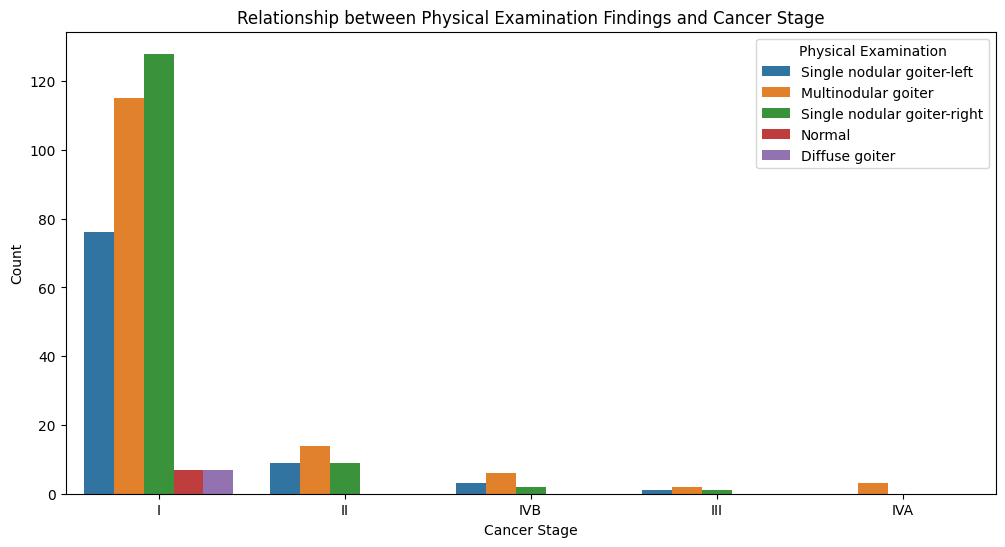

In [21]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Stage', hue='Physical Examination')
plt.title('Relationship between Physical Examination Findings and Cancer Stage')
plt.xlabel('Cancer Stage')
plt.ylabel('Count')
plt.legend(title='Physical Examination')
plt.show()

#### Interpretation of data grouping and visualisations :
Patterns found  : 

- Whether certain physical examination findings are more common in early or late stages.
- If any specific finding is strongly associated with a particular stage.

##### Example Output Interpretation

- Single nodular goiter-left appears only in Stage I.
-  Multinodular goiter appears in Stages I, IVA, and IVB.
- Single nodular goiter-right appears in both Stage I and Stage IVB.

#### Conclusion
Based on the analysis, we can draw conclusions such as:

1. Single nodular goiter-left might be an early-stage finding.
2. Multinodular goiter spans both early and late stages, indicating it could be present throughout the disease's progression.
3. Single nodular goiter-right appears in both early and advanced stages, suggesting its presence might not be limited to a specific stage.

This analysis helps in understanding how physical examination findings correlate with cancer stages, which can be crucial for diagnosis and treatment planning.

###  Does age correlate with the stage of thyroid cancer?


In [22]:
df[['Age', 'Stage']]

,Age,Stage
0,27,I
1,34,I
2,30,I
3,62,I
4,62,I
...,...,...
378,72,IVB
379,81,IVB
380,72,IVB
381,61,IVA


In [24]:
grouped_age_data = df.groupby(['Stage', 'Age']).size().reset_index(name='Count')
print(grouped_age_data)

   Stage  Age  Count
0      I   15      1
1      I   17      3
2      I   18      1
3      I   19      2
4      I   20      6
..   ...  ...    ...
89   IVB   72      2
90   IVB   73      1
91   IVB   75      1
92   IVB   78      1
93   IVB   81      1

[94 rows x 3 columns]


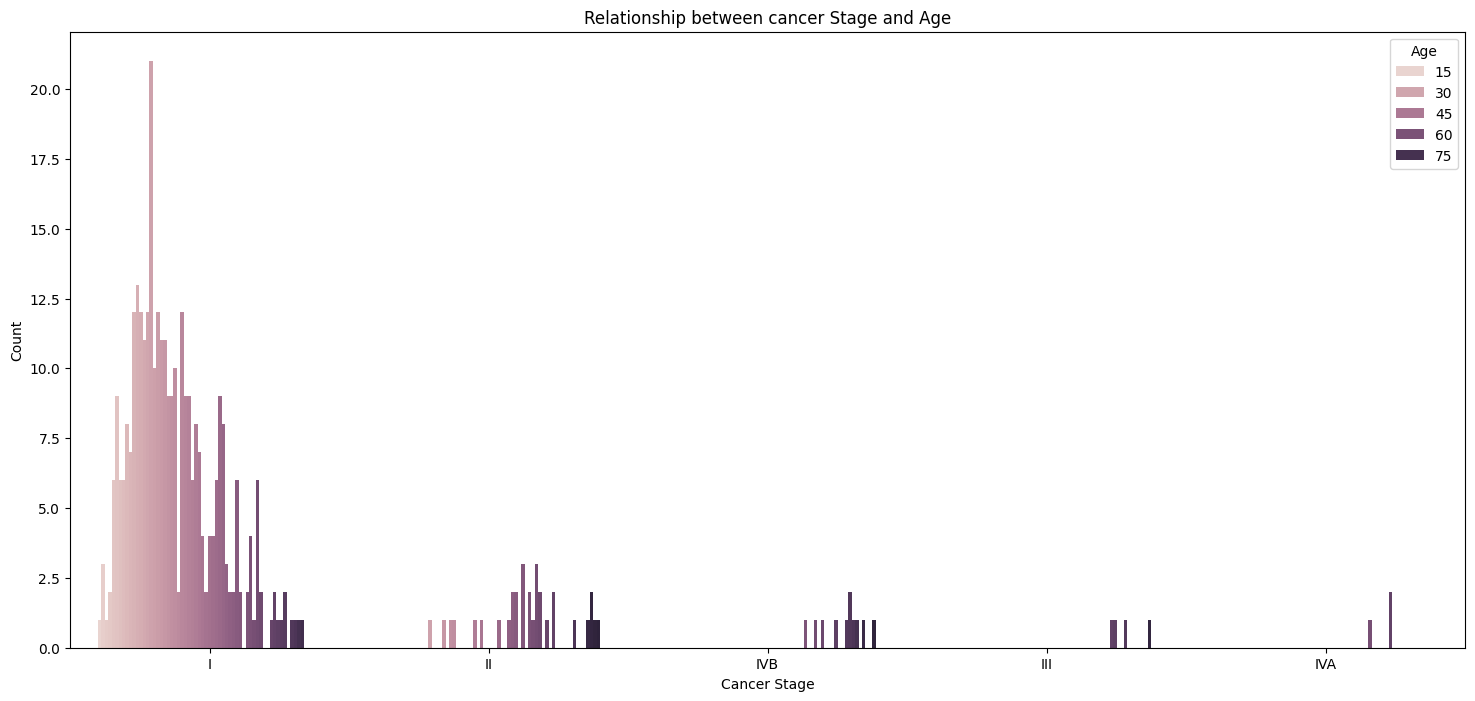

In [37]:
plt.figure(figsize=(18, 8))
sns.countplot(data=df, x='Stage', hue='Age')
plt.title('Relationship between cancer Stage and Age')
plt.xlabel('Cancer Stage')
plt.ylabel('Count')
plt.legend(title='Age')
plt.show()

Age is a continuous variable, therefore using countplot with hue='Age' does not work as intended. ]To make the plot more meaningful and  the age data more manageable, we can bin the ages into groups (e.g., 0-20, 21-40, etc.):

In [26]:
#Bin the ages into categories

age_bins = [0, 20, 40, 60, 80, 100]
age_labels = ['0-20', '21-40', '41-60', '61-80', '81-100']


- Age binning : We use the pd.cut function to bin continuous age values into discreet age groups



In [29]:
df['Age Group'] = pd.cut(df['Age'], bins =age_bins, labels = age_labels, right= True)


In [40]:
age_group_data = df.groupby(['Age Group', 'Stage'], observed=False).size().reset_index(name='Count')
age_group_data


,Age Group,Stage,Count
0,0-20,I,13
1,0-20,II,0
2,0-20,III,0
3,0-20,IVA,0
4,0-20,IVB,0
5,21-40,I,203
6,21-40,II,4
7,21-40,III,0
8,21-40,IVA,0
9,21-40,IVB,0


- Visualisation : The countplot function with hue='Age Group' now shows the distribution of different age groups across cancer stages.

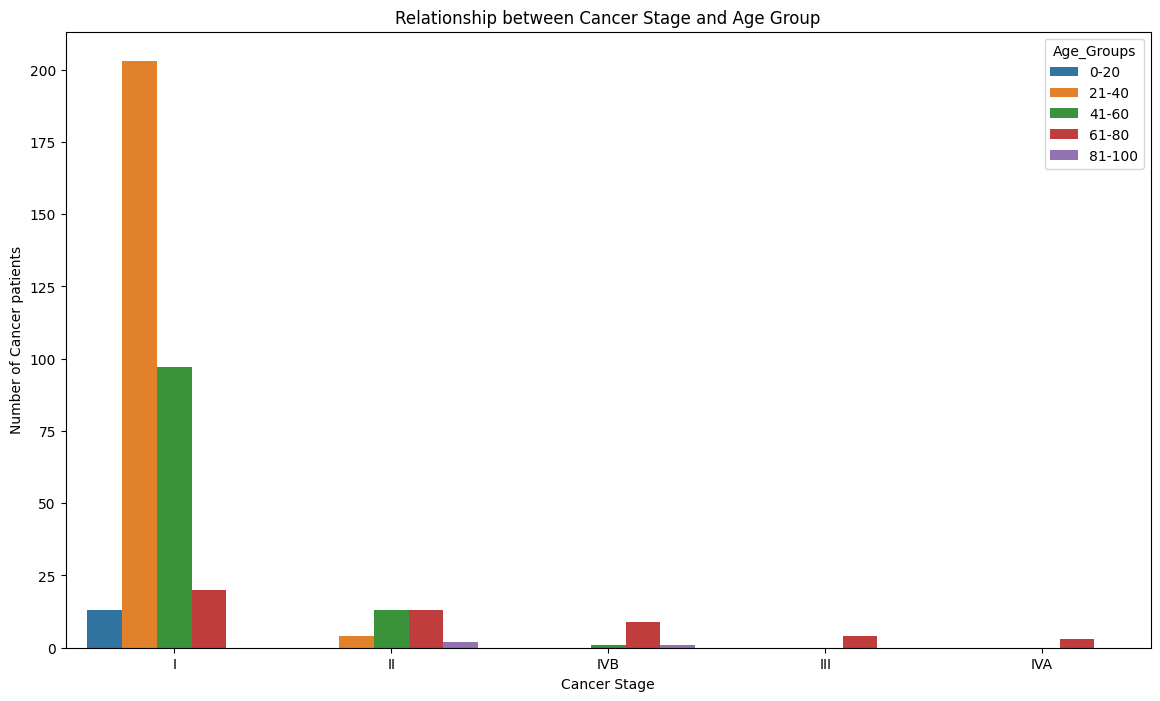

In [35]:
# Data plot 

plt.figure(figsize=(14, 8))
sns.countplot(data=df, x = 'Stage', hue='Age Group')
plt.title('Relationship between Cancer Stage and Age Group')
plt.xlabel('Cancer Stage')
plt.ylabel('Number of Cancer patients')
plt.legend(title='Age_Groups')
plt.show()

This plot will help us see if certain age groups are more prevalent in specific cancer stages, providing insights into any correlation between age and cancer stage.

ex : Stage Cancer type I is more prevelant in Age Group 21-40 and 41-60 or Stage III and IVA is prevelant in Age Group 61- 80.

### Does clinical hyperthyroidism or hypothyroidism affect the treatment response?

#### More Questions


14. What proportion of patients with micropapillary thyroid carcinoma have indeterminate responses?
15. How does the type of goiter (single nodular vs. multinodular) correlate with the risk level of cancer?
16. Are there differences in treatment responses between patients with uni-focal and multi-focal cancer?
17. What are the trends in cancer stage distribution for different age groups?
18. Does the presence of multifocality influence the risk of cancer recurrence?
19. What is the frequency of various risk levels across different age groups?
20. How does the number of cancer foci (uni-focal vs. multi-focal) affect patient outcomes?
21. Is there a correlation between clinical hyperthyroidism or hypothyroidism and cancer stage?
22. What are the differences in treatment response between patients with different thyroid function statuses?
23. How does a history of smoking impact the physical examination findings?
24. Are there any notable patterns in the staging of cancer based on the presence or absence of adenopathy?
25. Does the presence of multinodular goiter correlate with a higher or lower cancer stage compared to single nodular goiter?
26. How does the presence of clinical hyperthyroidism or hypothyroidism correlate with the response to treatment?
27. What patterns emerge in the risk levels associated with different cancer stages?
28. Is there a significant difference in the frequency of indeterminate responses between different goiter types?
29. How does the combination of smoking status and history of radiotherapy impact cancer stage or response?
30. Are there any age-related differences in the likelihood of cancer recurrence?